In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_excel("TF_ACCIDENTS_VICTIMS_2005.xlsx")
df.head()

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,MS_VICT,MS_SLY_INJ,MS_SERLY_INJ,MS_DEAD_30_DAYS,CD_BUILD_UP_AREA,...,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_FR,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_FR,TX_RGN_DESCR_NL,CD_SEX,TX_SEX_DESCR_FR,TX_SEX_DESCR_NL
0,2005-11-25,14,5,Vendredi,vrijdag,1,1,0,0,1,...,Arrondissement Antwerpen,10000.0,Province d’Anvers,Provincie Antwerpen,2000,Région flamande,Vlaams Gewest,1,Masculin,Mannelijk
1,2005-10-19,21,3,Mercredi,woensdag,1,1,0,0,2,...,Arrondissement Antwerpen,10000.0,Province d’Anvers,Provincie Antwerpen,2000,Région flamande,Vlaams Gewest,1,Masculin,Mannelijk
2,2005-10-22,11,6,Samedi,zaterdag,1,0,1,0,2,...,Arrondissement Antwerpen,10000.0,Province d’Anvers,Provincie Antwerpen,2000,Région flamande,Vlaams Gewest,1,Masculin,Mannelijk
3,2005-10-18,8,2,Mardi,dinsdag,1,1,0,0,9,...,Arrondissement Antwerpen,10000.0,Province d’Anvers,Provincie Antwerpen,2000,Région flamande,Vlaams Gewest,2,Féminin,Vrouwelijk
4,2005-10-10,15,1,Lundi,maandag,1,1,0,0,2,...,Arrondissement Antwerpen,10000.0,Province d’Anvers,Provincie Antwerpen,2000,Région flamande,Vlaams Gewest,2,Féminin,Vrouwelijk


In [20]:
data = df[["DT_DAY", "MS_VICT", "TX_BUILD_UP_AREA_DESCR_NL", "TX_VICT_TYPE_DESCR_NL", "TX_ROAD_USR_TYPE_DESCR_NL", "TX_ROAD_TYPE_DESCR_NL", "TX_AGE_CLS_DESCR_NL", "TX_PROV_DESCR_NL", "TX_SEX_DESCR_NL"]]
data.head()

,DT_DAY,MS_VICT,TX_BUILD_UP_AREA_DESCR_NL,TX_VICT_TYPE_DESCR_NL,TX_ROAD_USR_TYPE_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_AGE_CLS_DESCR_NL,TX_PROV_DESCR_NL,TX_SEX_DESCR_NL
0,2005-11-25,1,Binnen bebouwde kom,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Mannelijk
1,2005-10-19,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,45 tot 49 jaar,Provincie Antwerpen,Mannelijk
2,2005-10-22,1,Buiten bebouwde kom,Bestuurder,Personenauto,Autosnelweg,60 tot 64 jaar,Provincie Antwerpen,Mannelijk
3,2005-10-18,1,Onbekend,Bromfietser,Bromfiets B (tweewielige),Gewestweg,15 tot 19 jaar,Provincie Antwerpen,Vrouwelijk
4,2005-10-10,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,25 tot 29 jaar,Provincie Antwerpen,Vrouwelijk


In [21]:
data["Accidents"] = 1
data.head()

<ipython-input-21-087e3056ad5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Accidents"] = 1


,DT_DAY,MS_VICT,TX_BUILD_UP_AREA_DESCR_NL,TX_VICT_TYPE_DESCR_NL,TX_ROAD_USR_TYPE_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_AGE_CLS_DESCR_NL,TX_PROV_DESCR_NL,TX_SEX_DESCR_NL,Accidents
0,2005-11-25,1,Binnen bebouwde kom,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Mannelijk,1
1,2005-10-19,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,45 tot 49 jaar,Provincie Antwerpen,Mannelijk,1
2,2005-10-22,1,Buiten bebouwde kom,Bestuurder,Personenauto,Autosnelweg,60 tot 64 jaar,Provincie Antwerpen,Mannelijk,1
3,2005-10-18,1,Onbekend,Bromfietser,Bromfiets B (tweewielige),Gewestweg,15 tot 19 jaar,Provincie Antwerpen,Vrouwelijk,1
4,2005-10-10,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,25 tot 29 jaar,Provincie Antwerpen,Vrouwelijk,1


In [22]:
data.set_index(["DT_DAY", "TX_BUILD_UP_AREA_DESCR_NL", "TX_VICT_TYPE_DESCR_NL", "TX_ROAD_USR_TYPE_DESCR_NL", "TX_ROAD_TYPE_DESCR_NL", "TX_AGE_CLS_DESCR_NL", "TX_PROV_DESCR_NL", "TX_SEX_DESCR_NL", "Accidents"]).count(level="TX_VICT_TYPE_DESCR_NL")

,MS_VICT
TX_VICT_TYPE_DESCR_NL,
Autres victimes,1208
Bestuurder,25475
Bromfietser,4868
Fietser,8000
Motorfietser,3189
Onbekend,3516
Passagier,12370
Voetganger,4507


In [23]:
len(data)

63133

In [24]:
datanohighway = data[data.TX_ROAD_TYPE_DESCR_NL != "Autosnelweg"]

In [25]:
datanohighway.head()

,DT_DAY,MS_VICT,TX_BUILD_UP_AREA_DESCR_NL,TX_VICT_TYPE_DESCR_NL,TX_ROAD_USR_TYPE_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_AGE_CLS_DESCR_NL,TX_PROV_DESCR_NL,TX_SEX_DESCR_NL,Accidents
0,2005-11-25,1,Binnen bebouwde kom,Fietser,Fiets,Gemeenteweg,50 tot 54 jaar,Provincie Antwerpen,Mannelijk,1
1,2005-10-19,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,45 tot 49 jaar,Provincie Antwerpen,Mannelijk,1
3,2005-10-18,1,Onbekend,Bromfietser,Bromfiets B (tweewielige),Gewestweg,15 tot 19 jaar,Provincie Antwerpen,Vrouwelijk,1
4,2005-10-10,1,Buiten bebouwde kom,Bestuurder,Personenauto,Gemeenteweg,25 tot 29 jaar,Provincie Antwerpen,Vrouwelijk,1
6,2005-12-03,1,Buiten bebouwde kom,Bestuurder,Lichte vrachtauto,Gewestweg,55 tot 59 jaar,Provincie Antwerpen,Mannelijk,1


In [26]:
len(datanohighway)

57426

In [27]:
datanohighway.set_index(["DT_DAY", "TX_BUILD_UP_AREA_DESCR_NL", "TX_VICT_TYPE_DESCR_NL", "TX_ROAD_USR_TYPE_DESCR_NL", "TX_ROAD_TYPE_DESCR_NL", "TX_AGE_CLS_DESCR_NL", "TX_PROV_DESCR_NL", "TX_SEX_DESCR_NL", "Accidents"]).count(level="TX_VICT_TYPE_DESCR_NL")

,MS_VICT
TX_VICT_TYPE_DESCR_NL,
Autres victimes,1198
Bestuurder,21718
Bromfietser,4859
Fietser,7990
Motorfietser,3001
Onbekend,3485
Passagier,10692
Voetganger,4483


In [28]:
datagrouped = data.groupby(by=["TX_PROV_DESCR_NL"]).sum()
datagrouped

,MS_VICT,Accidents
TX_PROV_DESCR_NL,,
Provincie Antwerpen,11449,11268
Provincie Henegouwen,6618,6427
Provincie Limburg,5597,5501
Provincie Luik,5696,5590
Provincie Luxemburg,1911,1872
Provincie Namen,2968,2923
Provincie Oost-Vlaanderen,9926,9797
Provincie Vlaams-Brabant,5597,5495
Provincie Waals-Brabant,1745,1705


In [29]:
groupednohighway = datanohighway.groupby(by=["TX_PROV_DESCR_NL"]).sum()

In [30]:
groupednohighway = groupednohighway.drop(columns=["Accidents"])
groupednohighway

,MS_VICT
TX_PROV_DESCR_NL,
Provincie Antwerpen,10441
Provincie Henegouwen,5963
Provincie Limburg,5311
Provincie Luik,5020
Provincie Luxemburg,1718
Provincie Namen,2765
Provincie Oost-Vlaanderen,8905
Provincie Vlaams-Brabant,4509
Provincie Waals-Brabant,1474


In [31]:
groupednohighwayreset = groupednohighway.reset_index()

<AxesSubplot:xlabel='TX_PROV_DESCR_NL', ylabel='MS_VICT'>

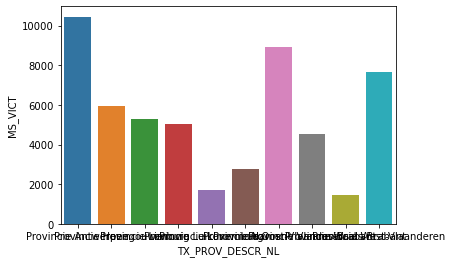

In [32]:
sns.barplot(data=groupednohighwayreset, x="TX_PROV_DESCR_NL", y="MS_VICT")